In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import util

In [2]:
ds1_train = pd.read_csv("ds1_train.csv")
ds2_train = pd.read_csv("ds2_train.csv")
ds1_val = pd.read_csv("ds1_valid.csv")
ds2_val = pd.read_csv("ds2_valid.csv")

In [3]:
xs1 = ds1_train[["x_1", "x_2"]]
xs2 = ds2_train[["x_1", "x_2"]]
ys1 = ds1_train[["y"]]
ys2 = ds2_train[["y"]]
valx1_1 = ds1_val[["x_1"]]
valx1_2 = ds1_val[["x_2"]]

In [4]:
ys1.shape

(800, 1)

In [5]:
x_train, y_train = util.load_dataset('ds1_train.csv', add_intercept=True)

In [6]:
x_eval, y_eval = util.load_dataset('ds1_valid.csv', add_intercept=True)

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def gradient(theta, x, y):
    z = x.dot(theta) * y
    g = -np.mean((1-sigmoid(z))*y*x.T, axis=1)
    return g
def hessian(theta, x, y):
    hessian = np.zeros((x.shape[1], x.shape[1]))
    z = y*x.dot(theta)
    for i in range(hessian.shape[1]):
        for j in range(hessian.shape[1]):
            if i <= j:
                hessian[i][j] = np.mean(sigmoid(z)*(1-sigmoid(z))*x[:,i]*x[:,j])
                if i == j:
                    hessian[j][i] = hessian[i][j]
    return hessian


In [8]:
thetazeros = np.zeros(x_train.shape[1])
def newton(theta0, x,y, gradient, hessian):
    theta = theta0
    eps=1e-5
    min = 1
    while min > eps:
        theta_prev = theta.copy()
        theta -= np.linalg.inv(hessian(theta, x, y)).dot(gradient(theta, x, y))
        min = np.linalg.norm(theta-theta_prev, ord=1)
    return theta

In [9]:
theta_final = newton(thetazeros, x_train, y_train, gradient, hessian)

In [19]:
theta_final

array([7.3653636 , 2.11422298, 1.64134245])

In [11]:
predictions = sigmoid(x_eval) 

In [12]:
predictions

array([[0.73105858, 0.42004114, 0.80847944],
       [0.73105858, 0.8103262 , 0.90574405],
       [0.73105858, 0.70081387, 0.70570567],
       [0.73105858, 0.39530506, 0.62116139],
       [0.73105858, 0.74645148, 0.9845142 ],
       [0.73105858, 0.51709212, 0.97358196],
       [0.73105858, 0.97941296, 1.        ],
       [0.73105858, 0.6526665 , 0.66755682],
       [0.73105858, 0.34497533, 0.51973077],
       [0.73105858, 0.62979849, 0.98905834],
       [0.73105858, 0.89937726, 0.99856308],
       [0.73105858, 0.40500458, 0.60419202],
       [0.73105858, 0.55398738, 0.99342658],
       [0.73105858, 0.61884952, 0.79638815],
       [0.73105858, 0.91652843, 0.99998102],
       [0.73105858, 0.3747311 , 0.70443071],
       [0.73105858, 0.64858964, 0.87225611],
       [0.73105858, 0.76896389, 0.80189641],
       [0.73105858, 0.92323693, 0.98806569],
       [0.73105858, 0.56756254, 0.92330019],
       [0.73105858, 0.61455572, 0.96941018],
       [0.73105858, 0.31614299, 0.6696818 ],
       [0.

In [17]:
clf = LogisticRegression()
parameters = clf.fit(x_train, y_train)

In [21]:
predictions = clf.predict(x_eval)

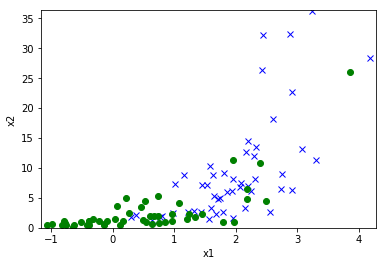

In [22]:
util.plot(x_eval, y_eval, parameters, 'logreg_pred_1.jpg')


In [15]:
class LogisticRegression:
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    def __init__(self, step_size=0.01, max_iter=10000, eps=1e-5,
                 theta_0=None, verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***
        def sigmoid(x):
            return 1/(1+np.exp(-x))
        def gradient(theta, x, y):
            z = x.dot(theta) * y
            g = -np.mean((1-sigmoid(z))*y*x.T, axis=1)
            return g
        def hessian(theta, x, y):
            hessian = np.zeros((x.shape[1], x.shape[1]))
            z = y*x.dot(theta)
            for i in range(hessian.shape[1]):
                for j in range(hessian.shape[1]):
                    if i <= j:
                        hessian[i][j] = np.mean(sigmoid(z)*(1-sigmoid(z))*x[:,i]*x[:,j])
                        if i == j:
                            hessian[j][i] = hessian[i][j]
            return hessian
        thetazeros = np.zeros(x.shape[1])
        def newton(theta0, x,y, gradient, hessian):
            theta = theta0
            eps=1e-5
            min = 1
            while min > eps:
                theta_prev = theta.copy()
                theta -= np.linalg.inv(hessian(theta, x, y)).dot(gradient(theta, x, y))
                min = np.linalg.norm(theta-theta_prev, ord=1)
            return theta

        theta_final = newton(thetazeros, x, y, gradient, hessian)
        return theta_final


        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """
        # *** START CODE HERE ***
        def sigmoid(x):
            return 1/(1+np.exp(-x))

        prediction = sigmoid(x)
        return prediction
